## 1. Framing the Problem

The objective of this lab is to perform univariate linear regression on the California Housing Prices dataset. We'll predict the median house value based on three individual features: median income, population, and number of households. Our goal is to identify which feature offers the best predictive power for median house value using linear regression evaluation metrics.


### Import Packages

In [37]:
import requests
import zipfile
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error



Dataset Source: [California Housing Prices](https://www.kaggle.com/api/v1/datasets/download/camnugent/california-housing-prices)


In [38]:


# --- Configuration ---
zip_url = "https://www.kaggle.com/api/v1/datasets/download/camnugent/california-housing-prices"
project_data_dir = os.path.join(".", "data")
zip_file_name = "california-housing-prices.zip"
zip_file_path = os.path.join(project_data_dir, zip_file_name)
extract_dir = os.path.join(project_data_dir, "california_housing_data")
cleanup_zip = True

# --- Ensure directories exist ---
os.makedirs(project_data_dir, exist_ok=True)
os.makedirs(extract_dir, exist_ok=True)

# --- Download ZIP from Kaggle (will fail without auth) ---
try:
    print("Downloading dataset from Kaggle...")
    response = requests.get(zip_url, stream=True)
    response.raise_for_status() 

    with open(zip_file_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print("Download completed.")

except requests.exceptions.RequestException as e:
    print(f"Download failed: {e}")
    exit(1)

# --- Extract CSV file ---
try:
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

    # Find CSV file
    csv_file_name = next((f for f in os.listdir(extract_dir) if f.endswith('.csv')), None)
    if not csv_file_name:
        raise FileNotFoundError("No CSV file found in the extracted content.")

    # Load into DataFrame
    csv_file_path = os.path.join(extract_dir, csv_file_name)
    df = pd.read_csv(csv_file_path)

    print(df.head(5))

except zipfile.BadZipFile:
    print("Error: Downloaded file is not a valid ZIP file.")
except Exception as e:
    print(f"Error during extraction or reading: {e}")

# --- Clean up ZIP file ---
if cleanup_zip and os.path.exists(zip_file_path):
    os.remove(zip_file_path)


Download completed.
Extracting dataset...
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


### scatter plots of the house value

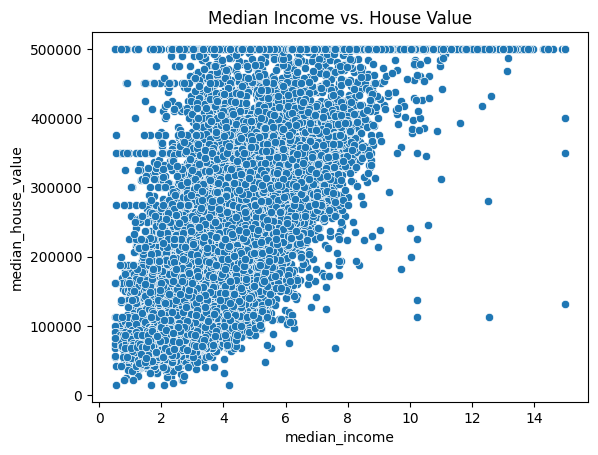

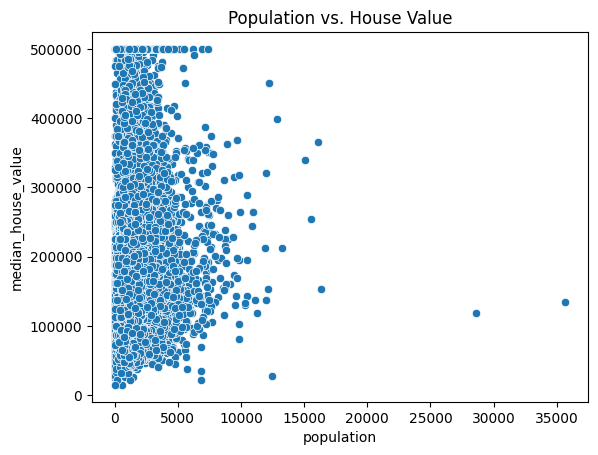

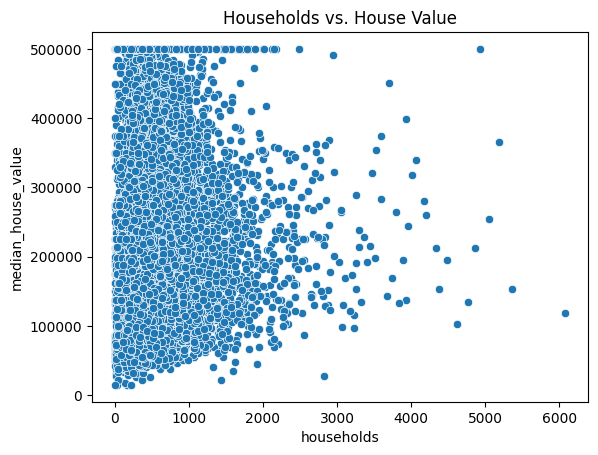

In [39]:
sactterPlot1 = sns.scatterplot(data=df, x="median_income", y="median_house_value")
sactterPlot1.set_title("Median Income vs. House Value")
plt.show()

sactterPlot2 = sns.scatterplot(data=df, x="population", y="median_house_value")
sactterPlot2.set_title("Population vs. House Value")
plt.show()

sactterPlot3 = sns.scatterplot(data=df, x="households", y="median_house_value")
sactterPlot3.set_title("Households vs. House Value")
plt.show()


### Observation of the scatter plots:
- **Median Income** has a strong positive correlation with house value.
- **Population** shows a weak, spread-out relationship.
- **Households** has moderate correlation but still noisy.



### Description of Variables:
- `median_house_value`: Target variable (price of house).
- `median_income`: Avg. income of people in a area.
- `population`: Total number of people in the area.
- `households`: Number of households in the area.



### Linear Regression Modeling

In [40]:
def run_regression(X, y):
    model = LinearRegression()
    model.fit(X, y)
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    mae = mean_absolute_error(y, preds)
    return model.intercept_, model.coef_[0], mse, mae, preds

features = ['median_income', 'population', 'households']
results = []

for feature in features:
    X = df[[feature]]
    y = df['median_house_value']
    intercept, slope, mse, mae, preds = run_regression(X, y)
    results.append((feature, intercept, slope, mse, mae))

results_df = pd.DataFrame(results, columns=['Feature', 'Intercept', 'Slope', 'MSE', 'MAE'])
results_df


,Feature,Intercept,Slope,MSE,MAE
0,median_income,45085.576703,41793.849202,7.011312e+09,62625.933791
1,population,210436.262076,-2.511753,1.330741e+10,91153.820095
2,households,196928.577162,19.872775,1.325778e+10,90802.743243


 ### Plot Lines on Top of Scatter Plots


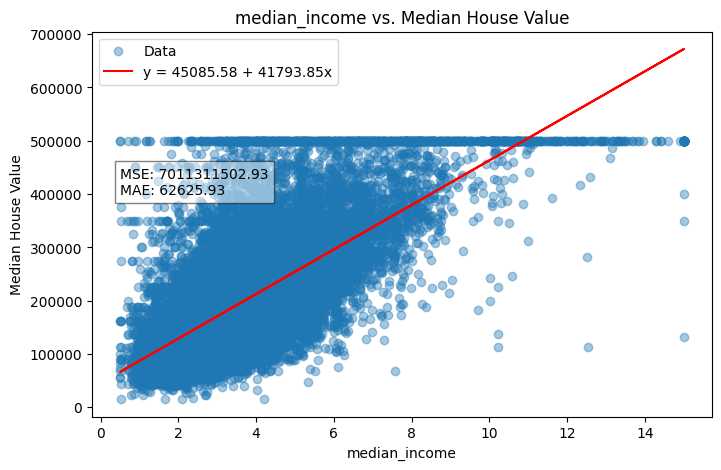

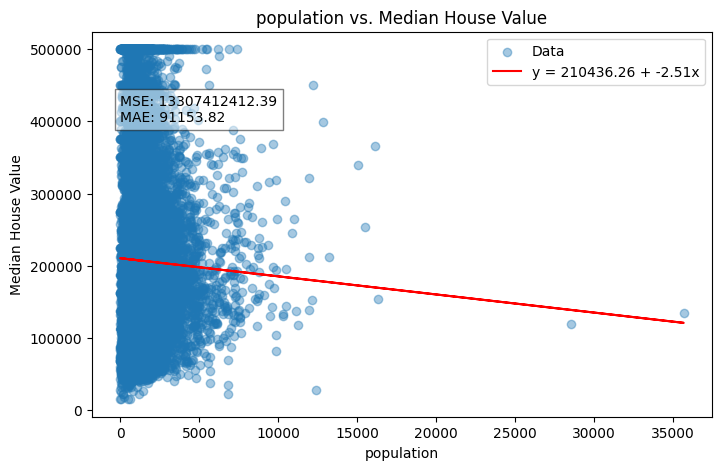

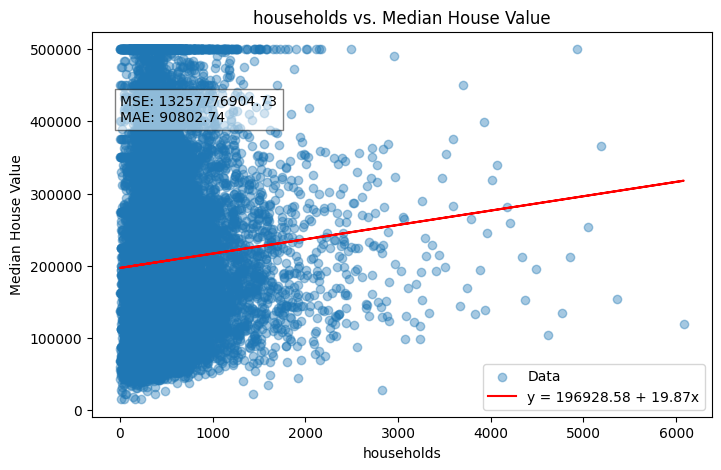

In [41]:
def plot_with_regression(x, y, intercept, slope, title, mse, mae):
    plt.figure(figsize=(8,5))
    plt.scatter(x, y, alpha=0.4, label="Data")
    plt.plot(x, intercept + slope * x, color="red", label=f"y = {intercept:.2f} + {slope:.2f}x")
    plt.title(title)
    plt.xlabel(x.name)
    plt.ylabel("Median House Value")
    plt.text(x.min(), y.max()*0.8, f"MSE: {mse:.2f}\nMAE: {mae:.2f}", fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    plt.legend()
    plt.show()

for feature, intercept, slope, mse, mae in results:
    plot_with_regression(df[feature], df["median_house_value"], intercept, slope,
                         f"{feature} vs. Median House Value", mse, mae)


## Summary

Among the three features:
- **Median Income** had the lowest MSE and MAE, showing a strong predictive ability.
- **Population** had the weakest correlation, and a poor model fit.
- **Number of Households** was better than population but worse than income.

### Recommendation:
If we had to choose one variable to predict house value, we would recommend using **median income** as it shows a strong linear relationship and lower prediction error.
